<B>TCC PUC MINAS - MAIO/2022</B><BR>
ANÁLISE DE PARCELAMENTO DE DÉBITOS INSCRITOS EM DÍVIDA ATIVA DA UNIÃO ATRAVÉS DE MACHINE LEARNING<BR>
FELIPE MARTINS<BR>

08 - ANÁLISE EXPLORATÓRIA
    
Tempo aproximado de processamento: 10 minutos

#  1. PREPARAÇÃO DOS DADOS

**Importando as bibliotecas necessárias**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

**Carregando a base de dados**

In [2]:
%%time
df=pd.read_csv('06_dataset_final_com_dados_categoricos.csv')

Wall time: 26 s


In [3]:
# EXCLUINDO COLUNA Unnamed
df = df.drop(columns=['Unnamed: 0'])

**Primeiras 5 linhas**

In [4]:
df.head()

,TIPO_PESSOA,TIPO_SITUACAO_INSCRICAO,SITUACAO_INSCRICAO,RECEITA_PRINCIPAL,INDICADOR_AJUIZADO,HA_OUTROS_DEBITOS,INSC_>1_ANO,VALOR_CONSOLIDADO,VALOR_FAIXA,SIT_CADAST,CNAE_PRINC,NAT_JURID,PORTE,ATIV_>10_ANOS,PARCELADO
0,PJ,Em cobrança,ATIVA EM COBRANCA,SIMPLES NACIONAL,NAO,S,S,55464.40,6.0,4.0,47.0,2062.0,3.0,S,N
1,PJ,Em cobrança,ATIVA AJUIZADA,Multa - CLT,SIM,S,S,55446.40,6.0,4.0,46.0,2062.0,5.0,S,N
2,PF,Benefício Fiscal,ATIVA NAO AJUIZAVEL NEGOCIADA NO SISPAR,OUTROS,NAO,S,N,3182.70,2.0,NaN,NaN,NaN,NaN,NaN,S
3,PJ,Em cobrança,ATIVA AJUIZADA,COFINS,SIM,S,S,3457828.22,9.0,8.0,26.0,2054.0,5.0,S,N
4,PJ,Em cobrança,ATIVA EM COBRANCA,Multa Isolada,NAO,N,S,1521.30,2.0,4.0,41.0,2062.0,1.0,S,N


**Últimas 5 linhas**

In [5]:
df.tail()

,TIPO_PESSOA,TIPO_SITUACAO_INSCRICAO,SITUACAO_INSCRICAO,RECEITA_PRINCIPAL,INDICADOR_AJUIZADO,HA_OUTROS_DEBITOS,INSC_>1_ANO,VALOR_CONSOLIDADO,VALOR_FAIXA,SIT_CADAST,CNAE_PRINC,NAT_JURID,PORTE,ATIV_>10_ANOS,PARCELADO
14992917,PJ,Benefício Fiscal,ATIVA AJUIZADA NEGOCIADA NO SISPAR,Multa - CLT,SIM,S,S,9487.12,3.0,4.0,86.0,2062.0,1.0,S,S
14992918,PJ,Em cobrança,ATIVA EM COBRANCA,SIMP NAC - MEI,NAO,N,N,5173.43,3.0,4.0,14.0,2135.0,1.0,N,N
14992919,PJ,Em cobrança,ATIVA AJUIZADA,COFINS,SIM,S,S,109317.16,7.0,2.0,41.0,2062.0,3.0,S,N
14992920,PF,Em cobrança,ATIVA EM COBRANCA,IRPF,NAO,S,N,2372.02,2.0,NaN,NaN,NaN,NaN,NaN,N
14992921,PJ,Em cobrança,ATIVA EM COBRANCA,SIMPLES NACIONAL,NAO,N,N,4997.24,2.0,2.0,47.0,2135.0,1.0,N,N


**Ajustando e analisando tipo de dados**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14992922 entries, 0 to 14992921
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   TIPO_PESSOA              object 
 1   TIPO_SITUACAO_INSCRICAO  object 
 2   SITUACAO_INSCRICAO       object 
 3   RECEITA_PRINCIPAL        object 
 4   INDICADOR_AJUIZADO       object 
 5   HA_OUTROS_DEBITOS        object 
 6   INSC_>1_ANO              object 
 7   VALOR_CONSOLIDADO        float64
 8   VALOR_FAIXA              float64
 9   SIT_CADAST               float64
 10  CNAE_PRINC               float64
 11  NAT_JURID                float64
 12  PORTE                    float64
 13  ATIV_>10_ANOS            object 
 14  PARCELADO                object 
dtypes: float64(6), object(9)
memory usage: 1.7+ GB


In [7]:
# CONVERTENDO TIPO DE DADOS DE ALGUNS CAMPOS PARA OBJECT (CATEGÓRICO)
df["SIT_CADAST"] = df["SIT_CADAST"].astype("object")
df["CNAE_PRINC"] = df["CNAE_PRINC"].astype("object")
df["NAT_JURID"] = df["NAT_JURID"].astype("object")
df["PORTE"] = df["PORTE"].astype("object")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14992922 entries, 0 to 14992921
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   TIPO_PESSOA              object 
 1   TIPO_SITUACAO_INSCRICAO  object 
 2   SITUACAO_INSCRICAO       object 
 3   RECEITA_PRINCIPAL        object 
 4   INDICADOR_AJUIZADO       object 
 5   HA_OUTROS_DEBITOS        object 
 6   INSC_>1_ANO              object 
 7   VALOR_CONSOLIDADO        float64
 8   VALOR_FAIXA              float64
 9   SIT_CADAST               object 
 10  CNAE_PRINC               object 
 11  NAT_JURID                object 
 12  PORTE                    object 
 13  ATIV_>10_ANOS            object 
 14  PARCELADO                object 
dtypes: float64(2), object(13)
memory usage: 1.7+ GB


**Verificando valores nulos**

In [9]:
df.isnull().sum()

TIPO_PESSOA                      0
TIPO_SITUACAO_INSCRICAO          0
SITUACAO_INSCRICAO               0
RECEITA_PRINCIPAL                0
INDICADOR_AJUIZADO               0
HA_OUTROS_DEBITOS                0
INSC_>1_ANO                      0
VALOR_CONSOLIDADO                0
VALOR_FAIXA                      2
SIT_CADAST                 2770935
CNAE_PRINC                 2770935
NAT_JURID                  2771198
PORTE                      2771204
ATIV_>10_ANOS              2770935
PARCELADO                        0
dtype: int64

**Mantendo-se os valores nulos**

Observe que todas se referem a dados cadastrais de CNPJ. Obviamente, os débitos de PF não possuem essa informação. Assim, deixaremos como estão, pois não atrapalharão a AE.

In [10]:
df.count()

TIPO_PESSOA                14992922
TIPO_SITUACAO_INSCRICAO    14992922
SITUACAO_INSCRICAO         14992922
RECEITA_PRINCIPAL          14992922
INDICADOR_AJUIZADO         14992922
HA_OUTROS_DEBITOS          14992922
INSC_>1_ANO                14992922
VALOR_CONSOLIDADO          14992922
VALOR_FAIXA                14992920
SIT_CADAST                 12221987
CNAE_PRINC                 12221987
NAT_JURID                  12221724
PORTE                      12221718
ATIV_>10_ANOS              12221987
PARCELADO                  14992922
dtype: int64

#  2. Análise de cada variável individualmente

**2.1. Estatística Descritiva - Variáveis numéricas**

In [11]:
df.describe()

,VALOR_CONSOLIDADO,VALOR_FAIXA
count,1.499292e+07,1.499292e+07
mean,1.451737e+05,3.581026e+00
std,9.254073e+06,1.876638e+00
min,0.000000e+00,1.000000e+00
25%,2.610460e+03,2.000000e+00
50%,7.003000e+03,3.000000e+00
75%,2.757519e+04,5.000000e+00
max,1.901909e+10,1.000000e+01


**2.2. Estatística descritiva - Variáveis categóricas**

In [12]:
df.describe(include=['O'])

,TIPO_PESSOA,TIPO_SITUACAO_INSCRICAO,SITUACAO_INSCRICAO,RECEITA_PRINCIPAL,INDICADOR_AJUIZADO,HA_OUTROS_DEBITOS,INSC_>1_ANO,SIT_CADAST,CNAE_PRINC,NAT_JURID,PORTE,ATIV_>10_ANOS,PARCELADO
count,14992922,14992922,14992922,14992922,14992922,14992922,14992922,12221987.0,12221987.0,12221724.0,12221718.0,12221987,14992922
unique,2,5,117,13,2,2,2,5.0,80.0,72.0,3.0,2,2
top,PJ,Em cobrança,ATIVA EM COBRANCA,SIMPLES NACIONAL,NAO,S,S,2.0,47.0,2062.0,1.0,S,N
freq,12223696,11476828,5029325,2662456,10107954,12987108,8999041,7698079.0,2477111.0,6846692.0,6865172.0,8583880,11540162


**2.3. Distribuição das variáveis (apenas para dados contínuos)**<BR>
<br>
   
Ambos os campos com dados contínuos (VALOR_CONSOLIDADO e VA-LOR_FAIXA) se referem ao mesmo dado: valor do débito. O valor consolidado é o valor exato, enquanto valor faixa classifica todos os valores em 10 faixas. Curiosamente, apresentam resultados diferentes no histograma. Apesar de ambos demonstrarem uma distribuição assimétrica à esquerda, o que indica que a maior parte dos débitos é de baixo valor, o campo valor_consolidado apresenta essa distribuição muito mais acentuada. Ou seja, a classificação em faixa que realizamos não ficou proporcional à distribuição dos valores originais. Em outras palavras, criamos várias faixas para valores muito pequenos, enquanto deixamos uma vasta gama de valores mais elevados em uma menor quantidade de faixas. Conclui-se, portanto, que essa classificação em faixas foi eficaz porque conseguiu estratificar melhor os valores, o que permite uma melhor análise, conforme faremos adiante.

array([[<AxesSubplot:title={'center':'VALOR_CONSOLIDADO'}>,
        <AxesSubplot:title={'center':'VALOR_FAIXA'}>]], dtype=object)

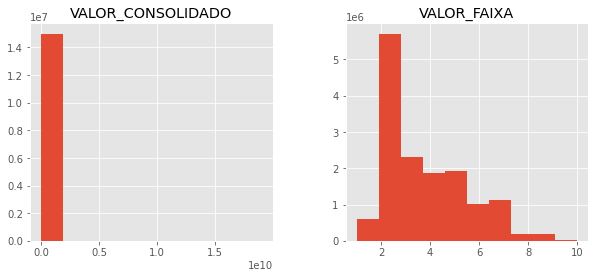

In [13]:
df.hist(figsize=(10,4))

**2.4. Análise da variável alvo ``PARCELADO``**

Observe que apenas 23% dos débitos foram parcelados (PARCELADO='S'), enquanto que os demais 77% continuaram devedores. Ou seja, temos um caso claro de **classes desbalanceadas**. Isso afetará a aplicação dos algoritmos de machine learning. Detalharemos isso no capítulo 5.


In [14]:
df['PARCELADO_num']=df['PARCELADO'].replace(['N','S'],[0,1])

In [15]:
df['PARCELADO'].value_counts()

N    11540162
S     3452760
Name: PARCELADO, dtype: int64

In [16]:
df['PARCELADO'].count()

14992922

In [17]:
# Porcentagem de débitos parcelados
df['PARCELADO_num'].sum()/df['PARCELADO'].count()

0.23029266743333954

<AxesSubplot:xlabel='PARCELADO', ylabel='count'>

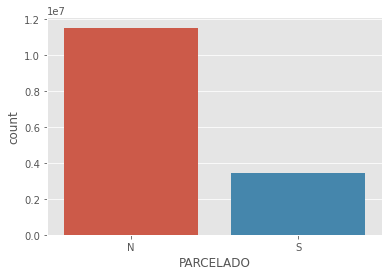

In [18]:
# Plotagem do gráfico
sns.countplot(data=df, x='PARCELADO')

#  3. Distribuições das variáveis em relação à variável alvo ``PARCELADO``

**3.1. DISTRIBUIÇÃO DAS CLASSES PARA OS CAMPOS NUMÉRICOS**

**3.1.1. VARIÁVEL VALOR CONSOLIDADO**

In [19]:
# VALOR TOTAL DA CARTEIRA
soma_valor = df['VALOR_CONSOLIDADO'].sum()
float_formatter = "R$ {:,.2f}".format
float_formatter(soma_valor)

'R$ 2,176,578,087,492.30'

In [20]:
pivot_valor_total = pd.pivot_table(df, index=['PARCELADO'], values='VALOR_CONSOLIDADO', aggfunc = 'sum')
pivot_valor_total.style.format({'VALOR_CONSOLIDADO':'R$ {:,.2f}'})

,VALOR_CONSOLIDADO
PARCELADO,
N,"R$ 1,886,265,794,791.40"
S,"R$ 290,312,292,700.90"


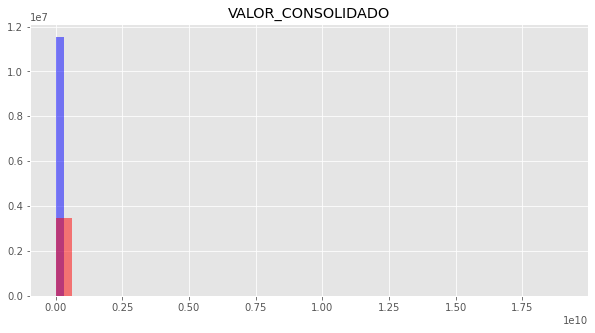

In [21]:
# DISTRIBUIÇÃO DAS CLASSES DE PARCELAMENTO X VALOR_CONSOLIDADO
x_cont=['VALOR_CONSOLIDADO']
fig, ax = plt.subplots(1, figsize=(10, 5));
df[df.PARCELADO == "N"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
df[df.PARCELADO == "S"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

In [22]:
contador_valor=pd.DataFrame(df['VALOR_CONSOLIDADO'].value_counts())
contador_valor.reset_index(inplace=True)
contador_valor.columns=(['valores','frequencia'])
list(contador_valor.values)


[array([ 1188.88, 13525.  ]),
 array([ 3714.45, 11532.  ]),
 array([14099.34, 10705.  ]),
 array([2845.67, 8552.  ]),
 array([4422.81, 6664.  ]),
 array([1426.65, 6395.  ]),
 array([4570.98, 5068.  ]),
 array([2972.2, 4865. ]),
 array([1812.34, 4680.  ]),
 array([1239.48, 4229.  ]),
 array([2697.5, 4145. ]),
 array([4442.3, 3865. ]),
 array([1174.91, 3769.  ]),
 array([1960.51, 3702.  ]),
 array([1279.08, 3691.  ]),
 array([2012.01, 3612.  ]),
 array([1256.86, 3542.  ]),
 array([1177.88, 3321.  ]),
 array([1885.29, 3192.  ]),
 array([1797.12, 3119.  ]),
 array([1262.58, 3088.  ]),
 array([3566.64, 3062.  ]),
 array([1893.87, 2925.  ]),
 array([2478.96, 2875.  ]),
 array([1180.19, 2837.  ]),
 array([1859.22, 2761.  ]),
 array([3566.28, 2687.  ]),
 array([1772.93, 2559.  ]),
 array([1401.04, 2392.  ]),
 array([1918.62, 2386.  ]),
 array([4443.02, 2357.  ]),
 array([1405.8, 2234. ]),
 array([1182.39, 2234.  ]),
 array([1171.5, 2209. ]),
 array([2682.68, 2198.  ]),
 array([1245.75, 2035.  

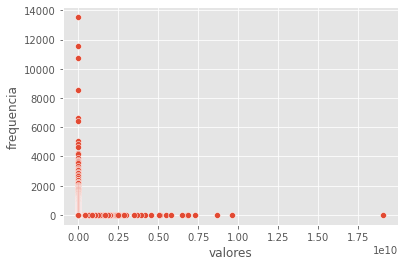

In [23]:
# GRÁFICO VALORES X FREQUÊNCIA VALOR_CONSOLIDADO
sns.scatterplot(data=contador_valor, x='valores',y='frequencia');

PARCELADO
N    163452.280375
S     84081.225657
Name: VALOR_CONSOLIDADO, dtype: float64

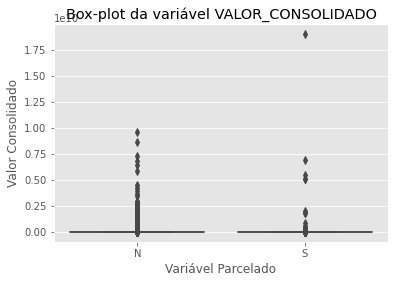

In [24]:
# BOX-PLOT VALOR_CONSOLIDADO X PARCELADO
#cols= [myred, myblue,mygreen]
sns.boxplot(x="PARCELADO", y="VALOR_CONSOLIDADO", data=df);
plt.title('Box-plot da variável VALOR_CONSOLIDADO');
plt.xlabel('Variável Parcelado');
plt.ylabel('Valor Consolidado');
df.groupby(['PARCELADO'])['VALOR_CONSOLIDADO'].mean()

**3.1.2. VARIÁVEL FAIXA DE VALOR**

A dificuldade em analisar o campo VALOR CONSOLIDADO justificou sua conversão em variável discreta através do campo FAIXA DE VALOR. Observa-se que as faixas 2, 3, 4 e 5 (valores de 1.000 a 50.000 reais) correspondem por 78% dos débitos.

FAIXA	VALOR R$<br>
F1	    Até 1.000,00<br>
F2	    De 1.000,01 a 5.000,00<br>
F3	    De 5.000,01 a 10.000,00<br>
F4	    De 10.000,01 a 20.000,00<br>
F5	    De 20.000,01 a 50.000,00<br>
F6	    De 50.000,01 a 100.000,00<br>
F7	    De 100.000,01 a 500.000,00<br>
F8	    De 500.000,01 a 1.000.000,00<br>
F9	    De 1.000.000,01 a 10.000.000,00<br>
F10	    Acima de 10.000.000,01<br>

In [25]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['VALOR_FAIXA'].value_counts()
percentual = df_cont['VALOR_FAIXA'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
2.0,5709103,38.078660
3.0,2318277,15.462478
5.0,1930306,12.874784
4.0,1880276,12.541093
7.0,1133213,7.558321
6.0,1017555,6.786903
1.0,594826,3.967379
8.0,194991,1.300554
9.0,191943,1.280224
10.0,22430,0.149604


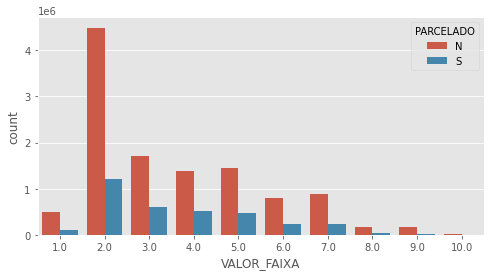

In [26]:
# Distribuição das classes x VALOR_FAIXA'
plt.figure(figsize=(8,4))
sns.countplot(data=df, x = 'VALOR_FAIXA',  hue = 'PARCELADO');

In [27]:
df_plot = df.groupby ('VALOR_FAIXA'). PARCELADO_num.mean (). reset_index () 
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,VALOR_FAIXA,PARCELADO_num
3,4.0,0.269352
2,3.0,0.261596
4,5.0,0.249128
5,6.0,0.225353
1,2.0,0.213471
6,7.0,0.211040
7,8.0,0.180142
0,1.0,0.179353
8,9.0,0.145569
9,10.0,0.089657


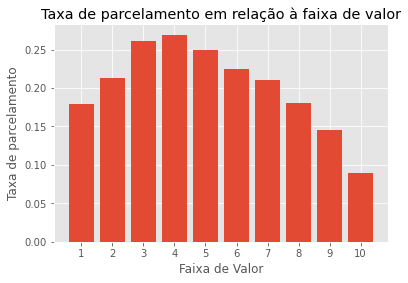

In [28]:
# Taxa de parcelamento em relação à faixa de valor
x=df_plot['VALOR_FAIXA']
y=df_plot['PARCELADO_num']
plt.bar(x,y);
plt.title('Taxa de parcelamento em relação à faixa de valor');
plt.xlabel('Faixa de Valor');
plt.ylabel('Taxa de parcelamento');
plt.xticks(x, (1,2,3,4,5,6,7,8,9,10));

**3.2. DISTRIBUIÇÃO DAS CLASSES PARA VARIÁVEIS CATEGÓRICAS**

**3.2.1. VARIÁVEL TIPO_SITUACAO_INSCRICAO**

In [29]:
# CONTAGEM DE VALORES
df['TIPO_SITUACAO_INSCRICAO'].value_counts()

Em cobrança                      11476828
Benefício Fiscal                  3452760
Garantia                            39092
Suspenso por decisão judicial       22229
Em negociação                        2013
Name: TIPO_SITUACAO_INSCRICAO, dtype: int64

In [30]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['TIPO_SITUACAO_INSCRICAO'].value_counts()
percentual = df_cont['TIPO_SITUACAO_INSCRICAO'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
Em cobrança,11476828,76.548307
Benefício Fiscal,3452760,23.029267
Garantia,39092,0.260736
Suspenso por decisão judicial,22229,0.148263
Em negociação,2013,0.013426


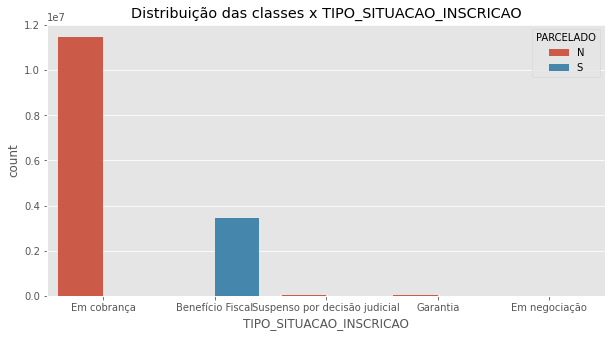

In [31]:
# Distribuição das classes x TIPO_PESSOA
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'TIPO_SITUACAO_INSCRICAO',  hue = 'PARCELADO');
plt.title('Distribuição das classes x TIPO_SITUACAO_INSCRICAO');

In [32]:
# TAXA DE PARCELAMENTO x TIPO_PESSOA (TABELA)
df_plot = df.groupby ('TIPO_SITUACAO_INSCRICAO'). PARCELADO_num.mean (). reset_index () 
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,TIPO_SITUACAO_INSCRICAO,PARCELADO_num
0,Benefício Fiscal,1.0
1,Em cobrança,0.0
2,Em negociação,0.0
3,Garantia,0.0
4,Suspenso por decisão judicial,0.0


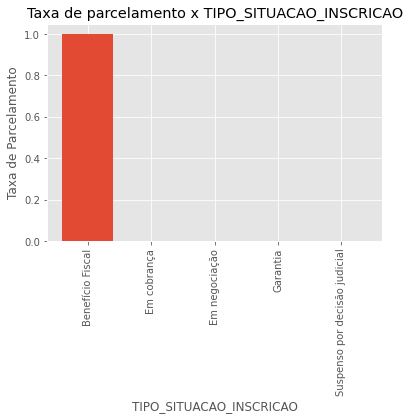

In [33]:
# TAXA DE PARCELAMENTO x TIPO_PESSOA (GRAF)
x=df_plot['TIPO_SITUACAO_INSCRICAO']
y=df_plot['PARCELADO_num']
plt.bar(x,y);
plt.title('Taxa de parcelamento x TIPO_SITUACAO_INSCRICAO');
plt.xlabel('TIPO_SITUACAO_INSCRICAO');
plt.ylabel('Taxa de Parcelamento');
plt.xticks(rotation=90);

**3.2.2. VARIÁVEL SITUACAO_INSCRICAO**

In [34]:
# CONTAGEM DE VALORES
df['SITUACAO_INSCRICAO'].value_counts()

ATIVA EM COBRANCA                                                    5029325
ATIVA AJUIZADA                                                       3712324
ATIVA NAO AJUIZAVEL NEGOCIADA NO SISPAR                              2644713
ATIVA A SER AJUIZADA                                                 1272596
ATIVA NAO PRIORIZADA PARA AJUIZAMENTO                                 835908
                                                                      ...   
ATIVA PARCELADA ART 8 MP 303/06 E AJUIZAMENTO A SER CANCELADO              1
ATIVA COM AJUIZAMENTO SUSPENSO PARA ANALISE DO ORGAO DE ORIGEM             1
ATIVA AJUIZADA OPCAO PAGAMENTO A VISTA MP470                               1
ATIVA NAO AJUIZADA COM EXIBILIDADE SUSPENSA - ANALISE MP 449               1
ATIVA COM PARCELAMENTO SIMPLIFICADO E AJUIZAMENTO A SER CANCELADO          1
Name: SITUACAO_INSCRICAO, Length: 117, dtype: int64

In [35]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['SITUACAO_INSCRICAO'].value_counts()
percentual = df_cont['SITUACAO_INSCRICAO'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
ATIVA EM COBRANCA,5029325,33.544662
ATIVA AJUIZADA,3712324,24.760510
ATIVA NAO AJUIZAVEL NEGOCIADA NO SISPAR,2644713,17.639744
ATIVA A SER AJUIZADA,1272596,8.487979
ATIVA NAO PRIORIZADA PARA AJUIZAMENTO,835908,5.575351
...,...,...
ATIVA PARCELADA ART 8 MP 303/06 E AJUIZAMENTO A SER CANCELADO,1,0.000007
ATIVA COM AJUIZAMENTO SUSPENSO PARA ANALISE DO ORGAO DE ORIGEM,1,0.000007
ATIVA AJUIZADA OPCAO PAGAMENTO A VISTA MP470,1,0.000007
ATIVA NAO AJUIZADA COM EXIBILIDADE SUSPENSA - ANALISE MP 449,1,0.000007


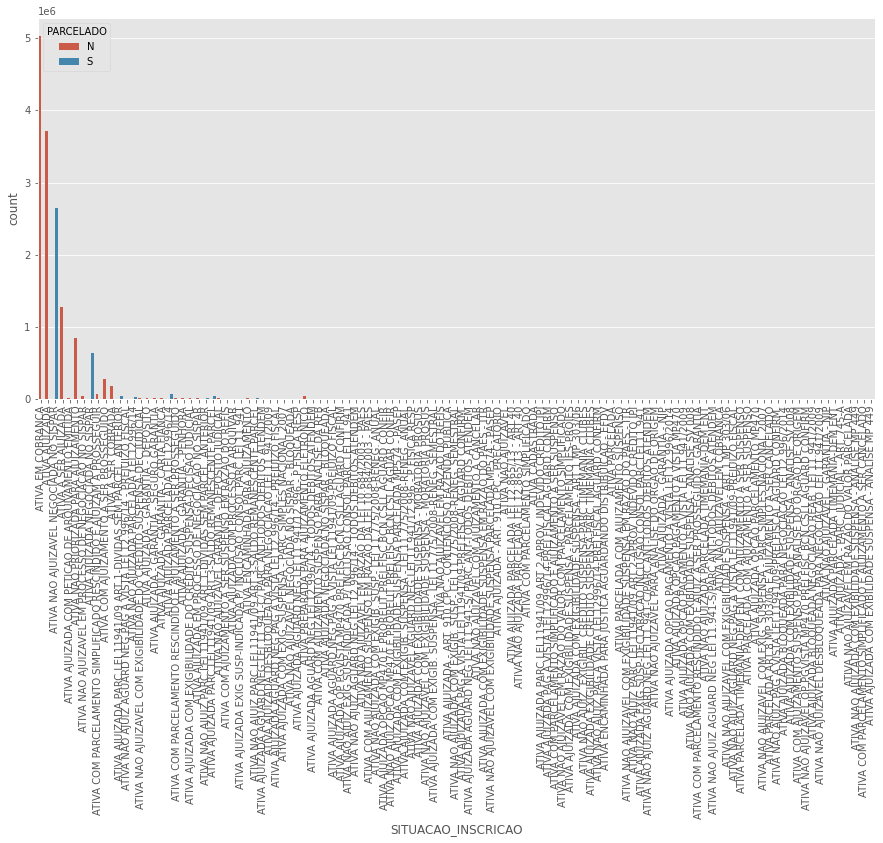

In [36]:
# DISTRIBUIÇÃO DAS CLASSES DE PARCELAMENTO X SITUACAO_INSCRICAO_INICIAL
plt.figure(figsize=(15,7))
sns.countplot(data=df, x = 'SITUACAO_INSCRICAO',  hue = 'PARCELADO')
plt.xticks(rotation=90);

In [37]:
# Taxa de parcelamento em relação à SITUACAO_INSCRICAO_INICIAL
# Impossível plotar gráfico: muitos valores
df_plot = df.groupby ('SITUACAO_INSCRICAO'). PARCELADO_num.mean (). reset_index () 
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,SITUACAO_INSCRICAO,PARCELADO_num
40,ATIVA AJUIZADA OPCAO MP470 E PRORELIT PREJ FIS...,1.0
56,ATIVA COM AJUIZAMENTO SUSPENSO EM RAZAO DA LEI...,1.0
92,ATIVA NAO AJUIZAVEL COM EXIG. SUSPENSA - PARC ...,1.0
52,ATIVA AJUIZADA PARCELADA TIMEMANIA-DEM ENT,1.0
51,ATIVA AJUIZADA PARCELADA LEI 12996/14,1.0
...,...,...
53,ATIVA CADASTRADA,0.0
42,ATIVA AJUIZADA OPCAO PAGAMENTO A VISTA LEI 12....,0.0
41,ATIVA AJUIZADA OPCAO PAGAMENTO A VISTA LEI 11....,0.0
33,ATIVA AJUIZADA EM PROCESSO DE NEGOCIACAO NO SI...,0.0


**3.3.7. Distribuição das classes de acordo com o TIPO DE PESSOA**

In [38]:
# CONTAGEM DE VALORES
df['TIPO_PESSOA'].value_counts()

PJ    12223696
PF     2769226
Name: TIPO_PESSOA, dtype: int64

In [39]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['TIPO_PESSOA'].value_counts()
percentual = df_cont['TIPO_PESSOA'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
PJ,12223696,81.529778
PF,2769226,18.470222


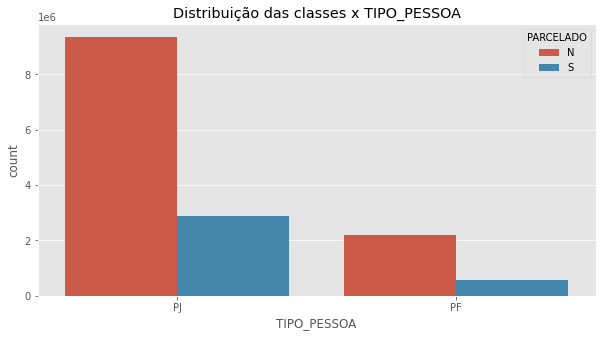

In [40]:
# Distribuição das classes x TIPO_PESSOA
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'TIPO_PESSOA',  hue = 'PARCELADO');
plt.title('Distribuição das classes x TIPO_PESSOA');

In [41]:
# TAXA DE PARCELAMENTO x TIPO_PESSOA (TABELA)
df_plot = df.groupby ('TIPO_PESSOA'). PARCELADO_num.mean (). reset_index () 
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,TIPO_PESSOA,PARCELADO_num
1,PJ,0.234586
0,PF,0.211342


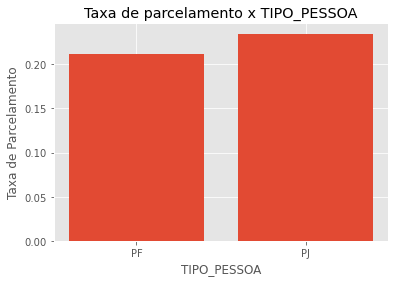

In [42]:
# TAXA DE PARCELAMENTO x TIPO_PESSOA (GRAF)
x=df_plot['TIPO_PESSOA']
y=df_plot['PARCELADO_num']
plt.bar(x,y);
plt.title('Taxa de parcelamento x TIPO_PESSOA');
plt.xlabel('TIPO_PESSOA');
plt.ylabel('Taxa de Parcelamento');
#plt.xticks(x, ('PF','PJ'));

**3.3.2. Distribuição da variável 'CNAE_PRINC'**

In [43]:
# CONTAGEM DE VALORES
# Em virtude da enorme quantidade de linhas (80) exportou-se esse resultado para csv, para uma melhor análise.
count_cnae = df['CNAE_PRINC'].value_counts()
count_cnae.to_csv('count_cnae.csv')
count_cnae

47.0    2477111
46.0    1195482
49.0     648631
41.0     549760
56.0     531001
         ...   
97.0       2837
91.0       2753
99.0       1390
92.0       1104
39.0        563
Name: CNAE_PRINC, Length: 80, dtype: int64

In [44]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['CNAE_PRINC'].value_counts()
percentual = df_cont['CNAE_PRINC'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
47.0,2477111,20.267662
46.0,1195482,9.781405
49.0,648631,5.307083
41.0,549760,4.498123
56.0,531001,4.344637
...,...,...
97.0,2837,0.023212
91.0,2753,0.022525
99.0,1390,0.011373
92.0,1104,0.009033


In [45]:
# Taxa de parcelamento em relação ao CNAE_PRINC
# Em virtude da enorme quantidade de linhas (80) exportou-se esse resultado para csv, para uma melhor análise.
# Impossível plotar gráfico: muitas linhas
df_plot = df.groupby ('CNAE_PRINC'). PARCELADO_num.mean (). reset_index () 
df_plot.to_csv('count_cnae_taxa_parc.csv')
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,CNAE_PRINC,PARCELADO_num
58,75.0,0.432531
44,60.0,0.430371
52,69.0,0.377136
40,55.0,0.361551
65,84.0,0.361475
...,...,...
37,51.0,0.115368
75,94.0,0.106555
78,97.0,0.076489
73,92.0,0.073370


**3.3.3. Distribuição da variável 'NAT_JURID'**

In [46]:
# CONTAGEM DE VALORES
# Em virtude da enorme quantidade de linhas (80) exportou-se esse resultado para csv, para uma melhor análise.
count_nat_jurid = df['NAT_JURID'].value_counts()
count_nat_jurid.to_csv('count_nat_jurid.csv')
count_nat_jurid

2062.0    6846692
2135.0    2704032
2305.0    1660180
2240.0     423722
2054.0     261163
           ...   
3239.0          2
5010.0          2
1171.0          1
2275.0          1
1228.0          1
Name: NAT_JURID, Length: 72, dtype: int64

In [47]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['NAT_JURID'].value_counts()
percentual = df_cont['NAT_JURID'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
2062.0,6846692,56.020673
2135.0,2704032,22.124800
2305.0,1660180,13.583845
2240.0,423722,3.466958
2054.0,261163,2.136875
...,...,...
3239.0,2,0.000016
5010.0,2,0.000016
1171.0,1,0.000008
2275.0,1,0.000008


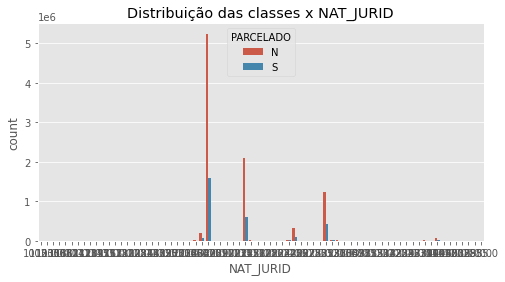

In [48]:
# Distribuição das classes x NAT_JURID'
plt.figure(figsize=(8,4))
sns.countplot(data=df, x = 'NAT_JURID',  hue = 'PARCELADO')
plt.title('Distribuição das classes x NAT_JURID');

In [49]:
# Taxa de parcelamento em relação à NAT_JURID
df_plot = df.groupby ('NAT_JURID'). PARCELADO_num.mean (). reset_index () 
df_plot.to_csv('count_nat_jurid_taxa_parc.csv')
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,NAT_JURID,PARCELADO_num
43,2267.0,0.846154
29,2089.0,0.611111
20,1279.0,0.540179
1,1023.0,0.437500
15,1210.0,0.424603
...,...,...
13,1171.0,0.000000
12,1163.0,0.000000
9,1139.0,0.000000
5,1082.0,0.000000


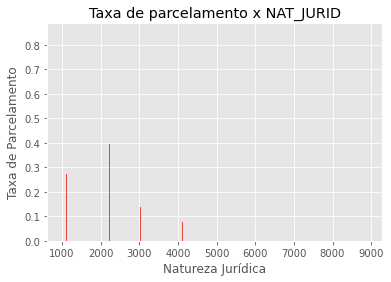

In [50]:
# Taxa de parcelamento x NAT_JURID
x=df_plot['NAT_JURID']
y=df_plot['PARCELADO_num']
plt.bar(x,y);
plt.title('Taxa de parcelamento x NAT_JURID');
plt.xlabel('Natureza Jurídica');
plt.ylabel('Taxa de Parcelamento');
#plt.xticks(x, (1,2,3,4,5,8));

**3.3.4. Distribuição das classes por Situação Cadastral do CNPJ**

CÓDIGO DA SITUAÇÃO CADASTRAL:<br>
1 – NULA<br>
2 – ATIVA<br>
3 – SUSPENSA<br>
4 – INAPTA<br>
8 – BAIXADA<br>

In [51]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['SIT_CADAST'].value_counts()
percentual = df_cont['SIT_CADAST'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
2.0,7698079,62.985495
4.0,2667775,21.827670
8.0,1786107,14.613884
3.0,69331,0.567265
1.0,695,0.005686


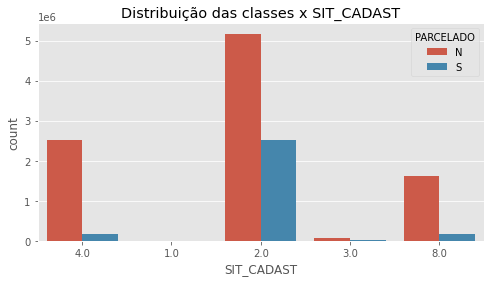

In [52]:
# Distribuição das classes x SIT_CADAST'
plt.figure(figsize=(8,4))
sns.countplot(data=df, x = 'SIT_CADAST',  hue = 'PARCELADO')
plt.title('Distribuição das classes x SIT_CADAST');
#plt.xticks(rotation=90);

In [53]:
# Taxa de parcelamento x SIT_CADAST
df_plot = df.groupby ('SIT_CADAST'). PARCELADO_num.mean (). reset_index () 
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,SIT_CADAST,PARCELADO_num
1,2.0,0.328318
2,3.0,0.121302
4,8.0,0.097277
3,4.0,0.059187
0,1.0,0.028777


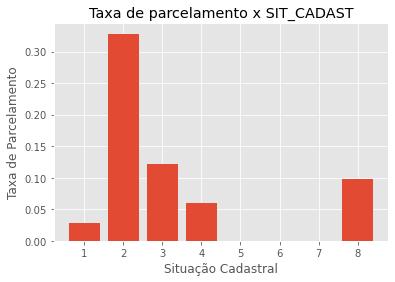

In [54]:
# Taxa de parcelamento x SIT_CADAST
x=df_plot['SIT_CADAST']
y=df_plot['PARCELADO_num']
plt.bar(x,y);
plt.title('Taxa de parcelamento x SIT_CADAST');
plt.xlabel('Situação Cadastral');
plt.ylabel('Taxa de Parcelamento');
#plt.xticks(x, (1,2,3,4,8));

**3.3.5. Distribuição das classes por Porte do CNPJ**

CÓDIGO DO PORTE:<br>
0 – NÃO INFORMADO<br>
1 – MICRO EMPRESA<br>
3 – EMPRESA DE PEQUENO PORTE<br>
5 – DEMAIS<br>

In [55]:
# CONTAGEM DE VALORES
df['PORTE'].value_counts()

1.0    6865172
5.0    3286435
3.0    2070111
Name: PORTE, dtype: int64

In [56]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['PORTE'].value_counts()
percentual = df_cont['PORTE'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
1.0,6865172,56.171906
5.0,3286435,26.890123
3.0,2070111,16.937971


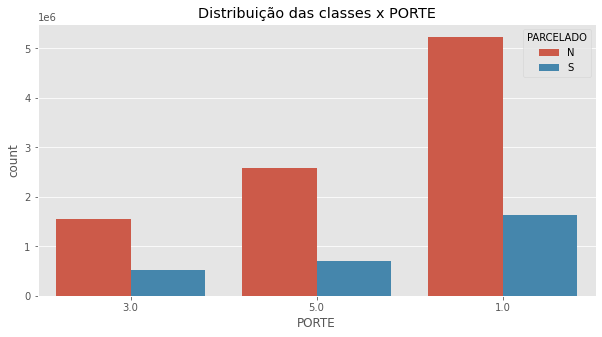

In [57]:
# Distribuição das classes x PORTE
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'PORTE',  hue = 'PARCELADO')
plt.title('Distribuição das classes x PORTE');

In [58]:
# TAXA DE PARCELAMENTO x PORTE (TABELA)
df_plot = df.groupby ('PORTE'). PARCELADO_num.mean (). reset_index () 
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,PORTE,PARCELADO_num
1,3.0,0.254059
0,1.0,0.238056
2,5.0,0.215202


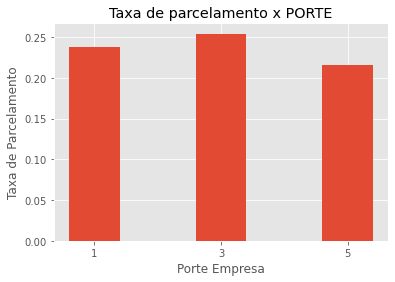

In [59]:
# TAXA DE PARCELAMENTO x PORTE (GRAF)
x=df_plot['PORTE']
y=df_plot['PARCELADO_num']
plt.bar(x,y);
plt.title('Taxa de parcelamento x PORTE');
plt.xlabel('Porte Empresa');
plt.ylabel('Taxa de Parcelamento');
plt.xticks(x, (1,3,5));

**3.3.6. Distribuição das classes por 'ATIV_>10_ANOS' do CNPJ**


In [60]:
# CONTAGEM DE VALORES
df['ATIV_>10_ANOS'].value_counts()

S    8583880
N    3638107
Name: ATIV_>10_ANOS, dtype: int64

In [61]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['ATIV_>10_ANOS'].value_counts()
percentual = df_cont['ATIV_>10_ANOS'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
S,8583880,70.233097
N,3638107,29.766903


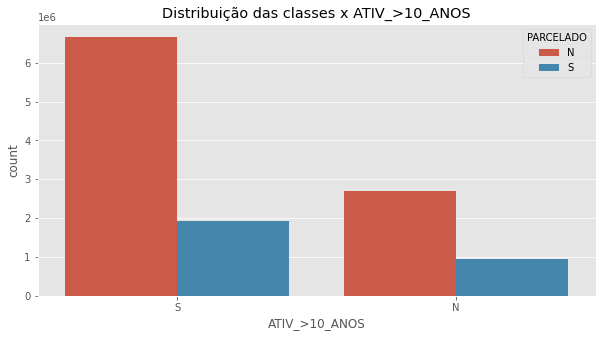

In [62]:
# Distribuição das classes x ATIV_>10_ANOS
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'ATIV_>10_ANOS',  hue = 'PARCELADO')
plt.title('Distribuição das classes x ATIV_>10_ANOS');

In [63]:
# TAXA DE PARCELAMENTO x ATIV_>10_ANOS (TABELA)
df_plot = df.groupby ('ATIV_>10_ANOS'). PARCELADO_num.mean (). reset_index () 
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,ATIV_>10_ANOS,PARCELADO_num
0,N,0.260785
1,S,0.223527


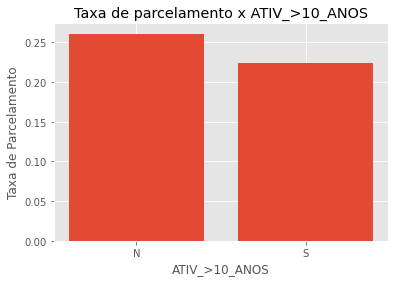

In [64]:
# TAXA DE PARCELAMENTO x ATIV_>10_ANOS (GRAF)
x=df_plot['ATIV_>10_ANOS']
y=df_plot['PARCELADO_num']
plt.bar(x,y);
plt.title('Taxa de parcelamento x ATIV_>10_ANOS');
plt.xlabel('ATIV_>10_ANOS');
plt.ylabel('Taxa de Parcelamento');
plt.xticks(x, ('N','S'));

**3.3.8. Distribuição da variável 'RECEITA_PRINCIPAL'**

In [65]:
# CONTAGEM DE VALORES
count_receita_princ = df['RECEITA_PRINCIPAL'].value_counts()
count_receita_princ

SIMPLES NACIONAL    2662456
IRPF                1810681
IRPJ                1651907
OUTROS              1644457
COFINS              1612494
CSLL                1587306
PIS                 1042228
Multa Isolada        809705
Multa - CLT          767020
SIMP NAC - MEI       552523
IRRF                 317248
SPU                  278586
SIMPLES              256311
Name: RECEITA_PRINCIPAL, dtype: int64

In [66]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['RECEITA_PRINCIPAL'].value_counts()
percentual = df_cont['RECEITA_PRINCIPAL'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
SIMPLES NACIONAL,2662456,17.758086
IRPF,1810681,12.076905
IRPJ,1651907,11.017912
OUTROS,1644457,10.968222
COFINS,1612494,10.755035
CSLL,1587306,10.587036
PIS,1042228,6.951467
Multa Isolada,809705,5.400582
Multa - CLT,767020,5.115881
SIMP NAC - MEI,552523,3.685226


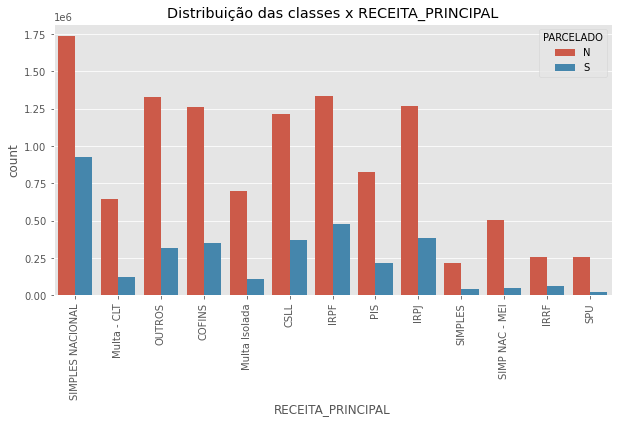

In [67]:
# Distribuição das classes x RECEITA_PRINCIPAL
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'RECEITA_PRINCIPAL',  hue = 'PARCELADO')
plt.title('Distribuição das classes x RECEITA_PRINCIPAL');
plt.xticks(rotation=90);

In [68]:
# TAXA DE PARCELAMENTO x RECEITA_PRINCIPAL (TABELA)
# Impossível plotar gráfico: muitos valores
df_plot = df.groupby ('RECEITA_PRINCIPAL'). PARCELADO_num.mean (). reset_index () 
df_plot.to_csv('count_receita_princ_taxa_parc.csv')
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,RECEITA_PRINCIPAL,PARCELADO_num
11,SIMPLES NACIONAL,0.349042
2,IRPF,0.264805
1,CSLL,0.234539
3,IRPJ,0.233850
0,COFINS,0.218599
8,PIS,0.206286
4,IRRF,0.201776
7,OUTROS,0.193294
5,Multa - CLT,0.157274
10,SIMPLES,0.152307


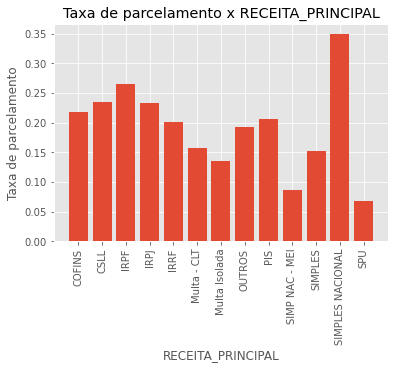

In [69]:
# TAXA DE PARCELAMENTO x RECEITA_PRINCIPAL (GRAF)
x=df_plot['RECEITA_PRINCIPAL']
y=df_plot['PARCELADO_num']
plt.bar(x,y);
plt.title('Taxa de parcelamento x RECEITA_PRINCIPAL');
plt.xlabel('RECEITA_PRINCIPAL');
plt.ylabel('Taxa de parcelamento');
plt.xticks(rotation=90);

**3.3.9. Distribuição da variável 'INSC_>1_ANO'**

In [70]:
# CONTAGEM DE VALORES
df['INSC_>1_ANO'].value_counts()

S    8999041
N    5993881
Name: INSC_>1_ANO, dtype: int64

In [71]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['INSC_>1_ANO'].value_counts()
percentual = df_cont['INSC_>1_ANO'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
S,8999041,60.021929
N,5993881,39.978071


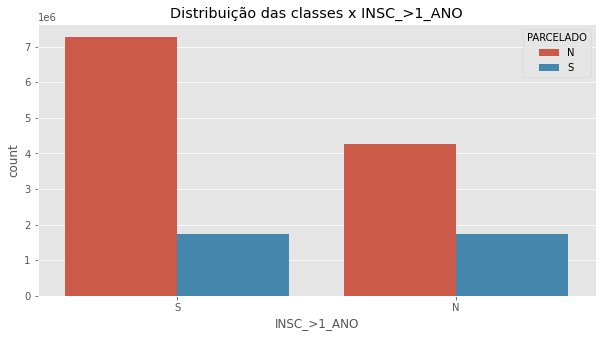

In [72]:
# Distribuição das classes x INSC_>1_ANO
plt.figure(figsize=(10,5))
sns.countplot(x="INSC_>1_ANO", hue='PARCELADO', data=df);
plt.title('Distribuição das classes x INSC_>1_ANO');

In [73]:
# TAXA DE PARCELAMENTO x INSC_>1_ANO (TABELA)
df_plot = df.groupby ('INSC_>1_ANO'). PARCELADO_num.mean (). reset_index () 
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,INSC_>1_ANO,PARCELADO_num
0,N,0.287745
1,S,0.192026


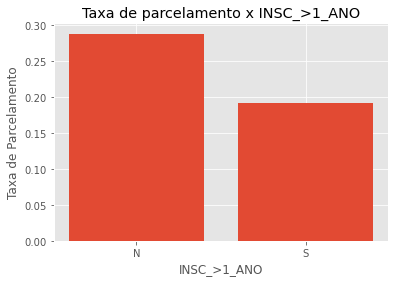

In [74]:
# TAXA DE PARCELAMENTO x INSC_>1_ANO (GRAF)
x=df_plot['INSC_>1_ANO']
y=df_plot['PARCELADO_num']
plt.bar(x,y);
plt.title('Taxa de parcelamento x INSC_>1_ANO');
plt.xlabel('INSC_>1_ANO');
plt.ylabel('Taxa de Parcelamento');
plt.xticks(x, ('N','S'));

**3.3.10. Correlação entre variáveis 'HA_OUTROS_DEBITOS' e 'PARCELADO'**

In [75]:
# CONTAGEM DE VALORES
df['HA_OUTROS_DEBITOS'].value_counts()

S    12987108
N     2005814
Name: HA_OUTROS_DEBITOS, dtype: int64

In [76]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['HA_OUTROS_DEBITOS'].value_counts()
percentual = df_cont['HA_OUTROS_DEBITOS'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
S,12987108,86.621594
N,2005814,13.378406


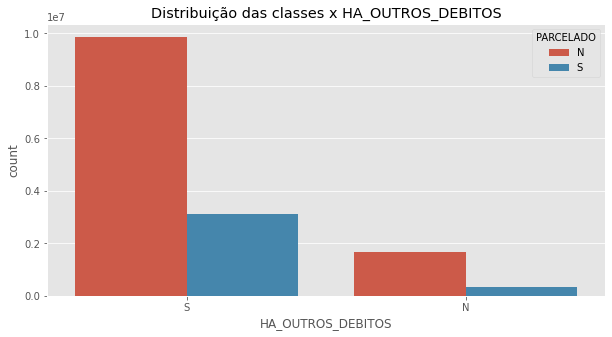

In [77]:
# Distribuição das classes x HA_OUTROS_DEBITOS
plt.figure(figsize=(10,5))
sns.countplot(x="HA_OUTROS_DEBITOS", hue='PARCELADO', data=df);
plt.title('Distribuição das classes x HA_OUTROS_DEBITOS');

In [78]:
# TAXA DE PARCELAMENTO x HA_OUTROS_DEBITOS (TABELA)
df_plot = df.groupby ('HA_OUTROS_DEBITOS'). PARCELADO_num.mean (). reset_index () 
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,HA_OUTROS_DEBITOS,PARCELADO_num
1,S,0.240268
0,N,0.165705


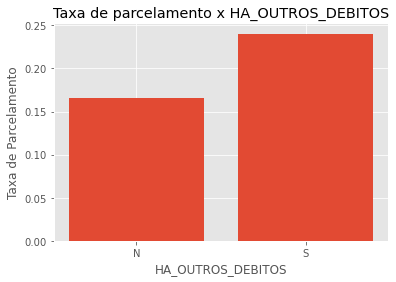

In [79]:
# TAXA DE PARCELAMENTO x HA_OUTROS_DEBITOS (GRAF)
x=df_plot['HA_OUTROS_DEBITOS']
y=df_plot['PARCELADO_num']
plt.bar(x,y);
plt.title('Taxa de parcelamento x HA_OUTROS_DEBITOS');
plt.xlabel('HA_OUTROS_DEBITOS');
plt.ylabel('Taxa de Parcelamento');
plt.xticks(x, ('N','S'));

**3.3.11. Correlação entre variáveis 'INDICADOR_AJUIZADO' e 'PARCELADO'**

In [80]:
# CONTAGEM DE VALORES
df['INDICADOR_AJUIZADO'].value_counts()

NAO    10107954
SIM     4884968
Name: INDICADOR_AJUIZADO, dtype: int64

In [81]:
# CONTAGEM DE VALORES COM PERCENTUAL
df_cont = df # cópia do dataset original para evitar que a variável percentual o normalize
frequencia = df_cont['INDICADOR_AJUIZADO'].value_counts()
percentual = df_cont['INDICADOR_AJUIZADO'].value_counts(normalize = True)*100
dist_freq_perc = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_perc

,Frequência,Porcentagem(%)
NAO,10107954,67.418172
SIM,4884968,32.581828


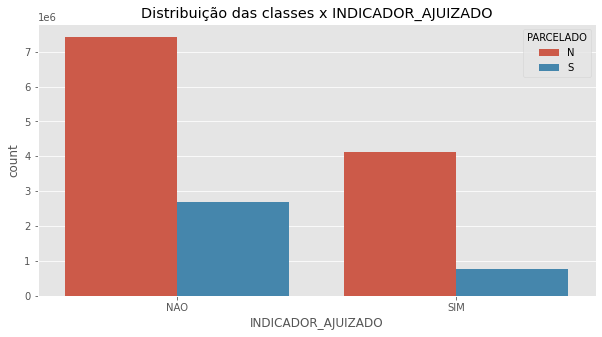

In [82]:
# Distribuição das classes x INDICADOR_AJUIZADO
plt.figure(figsize=(10,5))
sns.countplot(x="INDICADOR_AJUIZADO", hue='PARCELADO', data=df);
plt.title('Distribuição das classes x INDICADOR_AJUIZADO');

In [83]:
# TAXA DE PARCELAMENTO x INDICADOR_AJUIZADO (TABELA)
df_plot = df.groupby ('INDICADOR_AJUIZADO'). PARCELADO_num.mean (). reset_index () 
df_plot.sort_values(by=['PARCELADO_num'],ascending=False)

,INDICADOR_AJUIZADO,PARCELADO_num
0,NAO,0.265802
1,SIM,0.156817


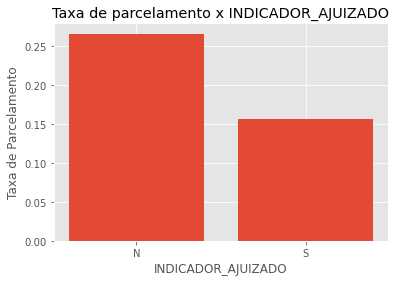

In [84]:
# TAXA DE PARCELAMENTO x INDICADOR_AJUIZADO (GRAF)
x=df_plot['INDICADOR_AJUIZADO']
y=df_plot['PARCELADO_num']
plt.bar(x,y);
plt.title('Taxa de parcelamento x INDICADOR_AJUIZADO');
plt.xlabel('INDICADOR_AJUIZADO');
plt.ylabel('Taxa de Parcelamento');
plt.xticks(x, ('N','S'));

# 4. CORRELAÇÃO DE TODAS AS VARIÁVEIS ENTRE SI (MAPA DE CALOR)

**Checando as correlações**

In [85]:
# AQUI UTILIZAREMOS O DATASET COM AS VARIÁVEIS JÁ CONVERTIDAS PARA DADOS CONTÍNUOS
df2 = pd.read_csv("07_dataset_final_com_dados_continuos.csv")

In [86]:
df2 = df2.drop(columns=['Unnamed: 0'])

In [87]:
df2

,TIPO_PESSOA,COD_TIPO_SIT_INSC,COD_SIT_INSC,COD_RECEITA,INDICADOR_AJUIZADO,HA_OUTROS_DEBITOS,INSC_>1_ANO,VALOR_CONSOLIDADO,VALOR_FAIXA,COD_SIT_CADAST,COD_CNAE_PRINC,COD_NAT_JURID,COD_PORTE,ATIV_>10_ANOS,PARCELADO
0,1,-12.053439,-11.230282,0.009147,0,1,1,1.024026e-04,0.777778,-1.556471,0.275200,0.023340,0.041484,1,0
1,1,13.265611,12.997051,-0.066197,0,1,1,1.364299e-07,0.111111,0.490522,0.586070,-0.060573,0.041484,1,1
2,1,-12.053439,-10.923435,-0.066197,1,1,1,2.608829e-05,0.666667,-1.556471,0.198774,0.115958,-0.080524,1,0
3,1,13.265611,12.997051,0.009147,0,1,0,2.460639e-07,0.111111,0.490522,-0.059852,0.147429,0.125105,0,1
4,1,13.265611,12.997051,0.021237,0,1,1,2.765668e-07,0.111111,0.490522,0.295323,0.023340,0.041484,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749642,1,-12.053439,-11.230282,0.009147,0,1,1,4.974330e-07,0.111111,0.490522,0.032369,0.023340,0.041484,0,0
749643,1,-12.053439,-9.848751,0.009147,0,1,1,4.684272e-07,0.111111,0.490522,0.000292,-0.060573,0.041484,1,0
749644,1,-12.053439,-11.230282,-0.629144,0,0,1,1.430652e-07,0.111111,0.490522,0.466813,-0.023395,-0.080524,1,0
749645,1,-12.053439,-11.230282,-0.066197,0,1,0,1.037075e-05,0.555556,0.490522,-0.057881,0.023340,-0.080524,1,0


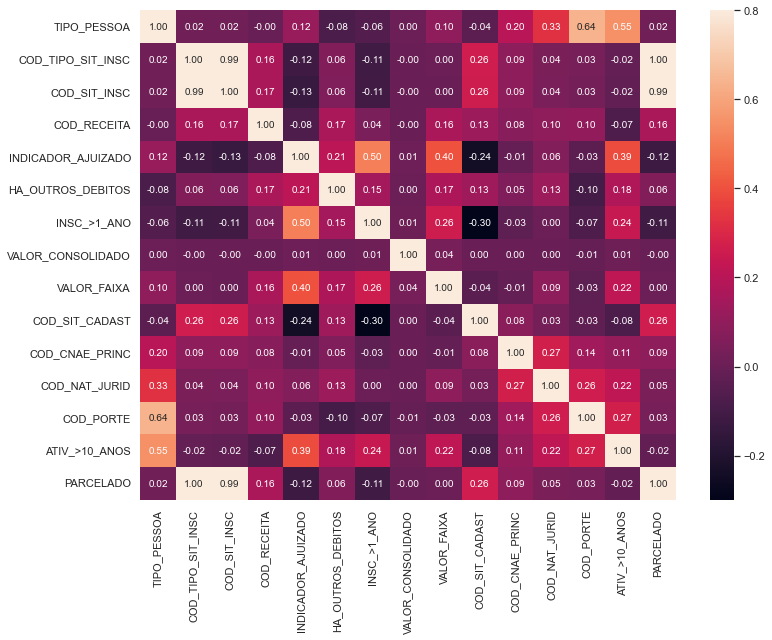

In [88]:
# APLICANDO-SE O HEATMAP
corr = df2.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 10}, annot=True, fmt='.2f');

In [89]:
corr_list = corr['PARCELADO'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

COD_TIPO_SIT_INSC     0.999333
COD_SIT_INSC          0.994037
COD_SIT_CADAST        0.260968
COD_RECEITA           0.163776
COD_CNAE_PRINC        0.094466
HA_OUTROS_DEBITOS     0.059807
COD_NAT_JURID         0.045565
COD_PORTE             0.034213
TIPO_PESSOA           0.021379
VALOR_FAIXA           0.002001
VALOR_CONSOLIDADO    -0.003720
ATIV_>10_ANOS        -0.016432
INSC_>1_ANO          -0.112324
INDICADOR_AJUIZADO   -0.119889
Name: PARCELADO, dtype: float64